In [66]:
# importing the required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
! pip install plotly --upgrade
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

Requirement already up-to-date: plotly in c:\users\aakas\anaconda3\lib\site-packages (3.10.0)


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
# Importing BenefitsCostSharing dataset

BCS_df = pd.read_csv("BenefitsCostSharing.csv")

C:\Users\aakas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# Displaying the first 10 rows of our dataset

BCS_df.head(10)

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,113,HIOS,21989AK0010001,AK,AK,6
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,114,HIOS,21989AK0010001,AK,AK,6
7,Major Dental Care - Adult,2014,50%,NaN,50%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,115,HIOS,21989AK0010001,AK,AK,6
8,Accidental Dental,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,118,HIOS,21989AK0010001,AK,AK,6
9,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-01,Yes,68,HIOS,21989AK0010001,AK,AK,6


In [11]:
# Replacing empty records with NaN

BCS_df = BCS_df.fillna(np.nan)

# Looking for the null values

BCS_df.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

In [17]:
# Checking the total number of rows in our dataset

len(BCS_df)

5048408

In [16]:
# Unique Benefits in the dataset

BCS_df.BenefitName.nunique()

861

In [18]:
# Summarizing our dataset

BCS_df.describe()

,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


In [21]:
# Top Benefits Year Wise

BCS_df[["BusinessYear", "BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                         
                   count unique                        top   freq
BusinessYear                                                     
2014             1164869    496  Major Dental Care - Adult  18719
2015             2079286    517        Orthodontia - Adult  31269
2016             1804253    429        Orthodontia - Adult  27389

In [22]:
# Analyzing the benefits State wise

BCS_df[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values('BenefitName')


,BenefitName
StateCode,
HI,6741
ID,27313
AL,28417
DE,31370
WV,32638
AK,41320
NH,44305
MS,46895
SD,47730


In [26]:
# Unique States

State_unique = BCS_df.StateCode.unique()
State_unique

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

In [30]:
# Creating a new array for Visualization

BCS_array = []
for state in State_unique:
    BCS_state = len(BCS_df[BCS_df["StateCode"]== state])
    BCS_array.append(BCS_state)

BCS_array

[41320,
 28417,
 221612,
 364742,
 196579,
 148531,
 91816,
 95152,
 46895,
 94290,
 48269,
 86107,
 133639,
 260866,
 111907,
 138154,
 465164,
 512587,
 48425,
 68064,
 31370,
 320533,
 64279,
 61834,
 189225,
 58132,
 44305,
 56669,
 142236,
 32638,
 110221,
 27313,
 66935,
 331045,
 47730,
 98421,
 62743,
 93502,
 6741]

<function matplotlib.pyplot.show(*args, **kw)>

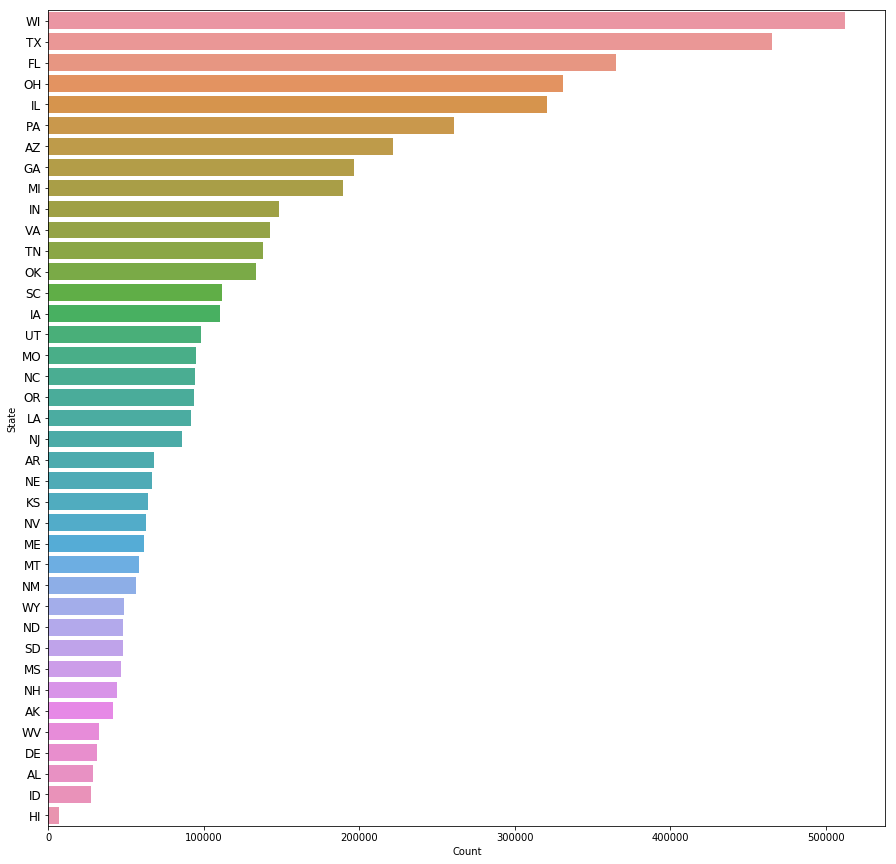

In [41]:
BCS_new = pd.DataFrame(
        { 'State' : State_unique,
         'Count' : BCS_array
        })

BCS_new = BCS_new.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15))
ax.set_yticklabels(State_unique, rotation='horizontal', fontsize='large')
g = sb.barplot(y = BCS_new.State, x = BCS_new.Count)
plt.show

In [117]:
scl = [
    [0.0, 'rgb(255,228,225)'],
    [0.2, 'rgb(255,182,193)'],
    [0.4, 'rgb(255,174,185)'],
    [0.6, 'rgb(238,162,173)'],
    [0.8, 'rgb(205,140,149)'],
    [1.0, 'rgb(139,95,101)']
]


data = dict(type = 'choropleth',
           locations = BCS_new['State'],
           locationmode = 'USA-states',
           colorscale = scl,
            text = BCS_new['State'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = BCS_new['Count'],
           colorbar = {'title':'No of Benefit plans'})

layout = dict(title = 'Benefit Plans across different States of USA',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)